In [14]:
# Importing the packages to be used in the Project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #for visualization
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_palette("BrBG")

In [15]:
# Gathering the Data through csv files
df=pd.read_csv('DataSets/Suicides in India 2001-2012.csv')


In [16]:
#  Reading/Accessing the Data
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [17]:
#Description of the Data 
df.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')

In [18]:
#Checking whether data is clean or not(Checking the null values)
df.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

# Q1) State with Highest number of Suicides in India

In [19]:
# Grouping the State with Total number of Suicides
df.groupby("State")["Total"].sum().sort_values(ascending=False)

State
Total (All India)    2911862
Total (States)       2858026
Maharashtra           901945
West Bengal           849936
Tamil Nadu            818691
Andhra Pradesh        814059
Karnataka             734825
Kerala                538946
Madhya Pradesh        451535
Gujarat               330858
Chhattisgarh          302354
Odisha                267234
Rajasthan             255134
Uttar Pradesh         233352
Assam                 172276
Haryana               147176
Delhi (Ut)             84272
Total (Uts)            53836
Jharkhand              49720
Punjab                 46350
Bihar                  46214
Tripura                45965
Puducherry             32144
Himachal Pradesh       26562
Uttarakhand            18496
Goa                    17363
Jammu & Kashmir        14821
Sikkim                  9606
A & N Islands           8109
Arunachal Pradesh       6633
Meghalaya               5415
Chandigarh              5164
Mizoram                 4154
D & N Haveli            3430
Manipur 

# Q2) What is the major Cause of suicide done by Females in India


In [20]:
1. #Creating the Filter of the problem statement
filt=(df['Type_code']=='Causes') & (df['Gender']=='Female')

2. #Applying the filter to get the results
df[filt].groupby('Type')['Total'].sum().sort_values(ascending=False)

Type
Family Problems                                   133181
Causes Not known                                   76899
Other Causes (Please Specity)                      71235
Other Prolonged Illness                            69072
Insanity/Mental Illness                            33352
Dowry Dispute                                      31206
Love Affairs                                       21339
Failure in Examination                             12054
Suspected/Illicit Relation                          8093
Poverty                                             7905
Cancellation/Non-Settlement of Marriage             6126
Not having Children(Barrenness/Impotency            5523
Death of Dear Person                                4707
Fall in Social Reputation                           4697
Property Dispute                                    4601
Bankruptcy or Sudden change in Economic             3877
Unemployment                                        3748
Illness (Aids/STD)        

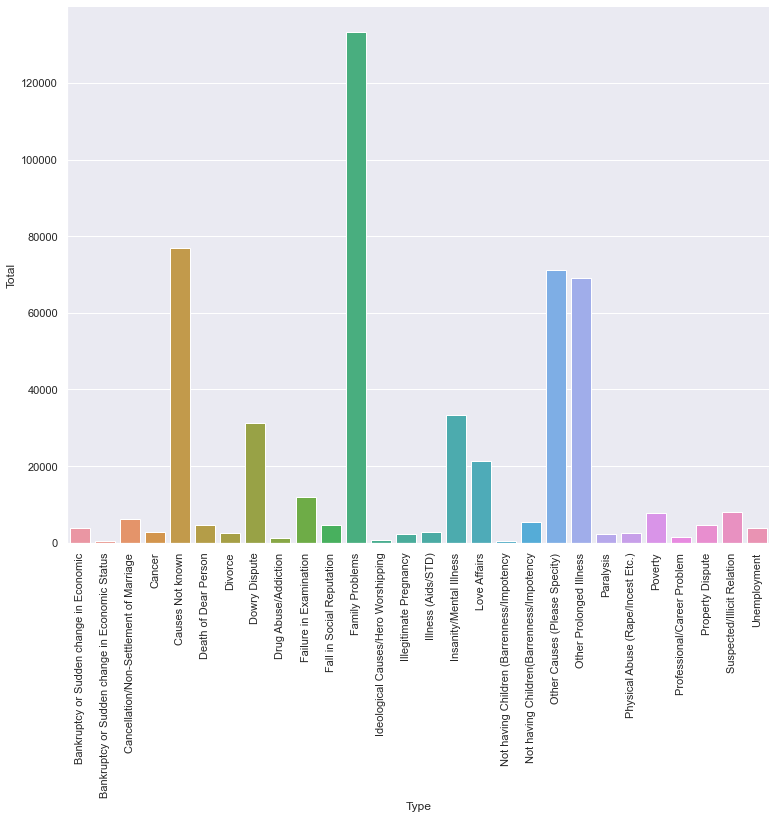

In [21]:
# 3.Plotting the graph
filter1 = pd.DataFrame(df[filt].groupby('Type')['Total'].sum()).reset_index()
g = sns.catplot(x="Type", y="Total", kind="bar", data=filter1,height=8.27, aspect=11.7/8.27);
g.set_xticklabels(rotation=90)

# Q3) Does Presence of partner reduces the rate of suicide

In [22]:
# 1.Knowing the Social Status of People
f1=df['Type_code']=='Social_Status'
# 2.Grouping the people with suicides and then taking the total
df[f1].groupby('Type')['Total'].sum().sort_values(ascending=False)

Type
Married            3065322
Never Married       954903
Widowed/Widower     186339
Seperated           115413
Divorcee             45816
Name: Total, dtype: int64

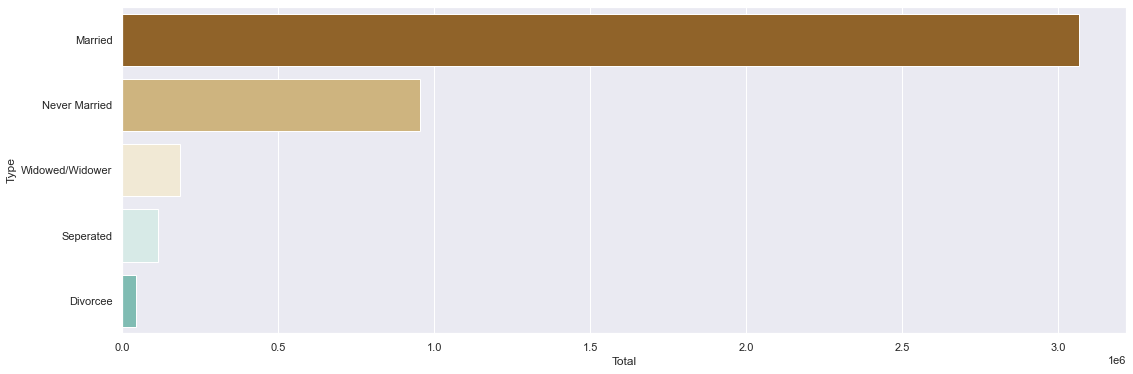

In [23]:
# 3.Plotting the graph
reasons = df[df['Type_code']=='Social_Status'].groupby('Type')['Total'].sum()
suicide_by_person = pd.DataFrame(reasons).reset_index().sort_values('Total',ascending=False)
suicide_by_person = suicide_by_person[:15]
plt.figure(figsize=(18,6))
g2 = sns.barplot(y='Type',x='Total',data=suicide_by_person)

# Q4) In which State child and elderly commit maximum suicide.

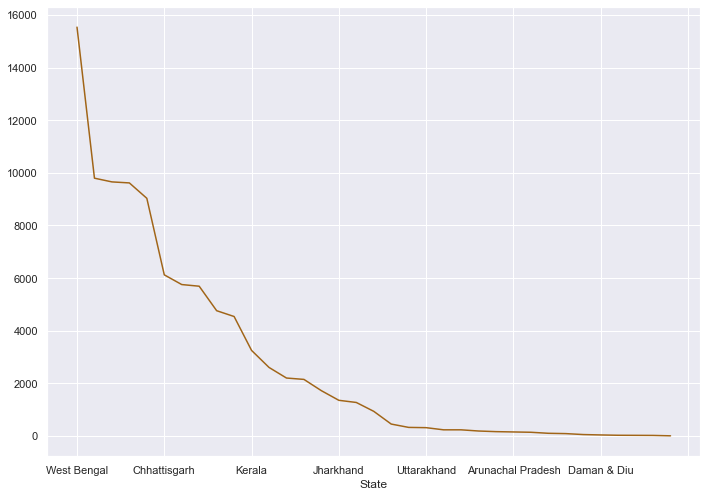

In [24]:
# 1.States in which child commit maximum Suicide and the plotting the Line Graph
df_child=df[df['Age_group']=='0-14'].groupby('State')['Total'].sum().sort_values(ascending=False)
df_child.plot(kind="line")


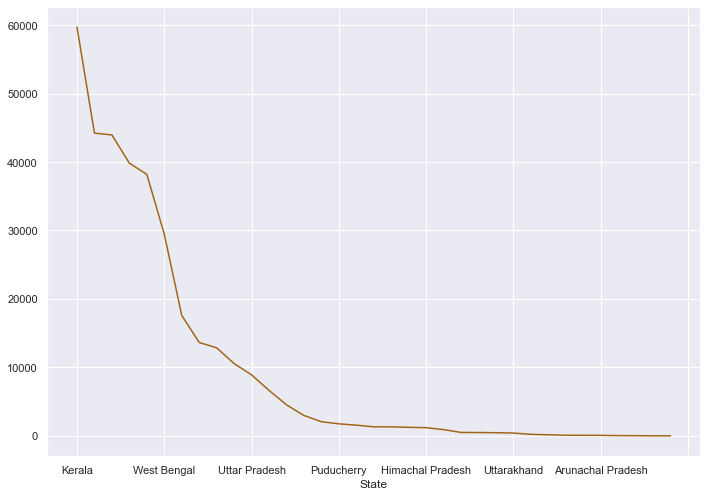

In [25]:
# 2.States in which elderly commit maximum Suicide and plotting the Line graph 
df_old=df[df['Age_group']=='60+'].groupby('State')['Total'].sum().sort_values(ascending=False)
df_old.plot(kind="line")

# Q5) Does imparting Education hiders rate of suicide

In [26]:
# 1.Grouping the people with education status
f3=df['Type_code']=='Education_Status'

# 2.Summing the people with suicides according to the Education status
filter_education=df[f3].groupby('Type')['Total'].sum().sort_values(ascending=False)
filter_education

Type
Primary                                     1088481
Middle                                      1028913
No Education                                 965271
Matriculate/Secondary                        769698
Hr. Secondary/Intermediate/Pre-Universit     356724
Graduate                                      93822
Diploma                                       42459
Post Graduate and Above                       22425
Name: Total, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

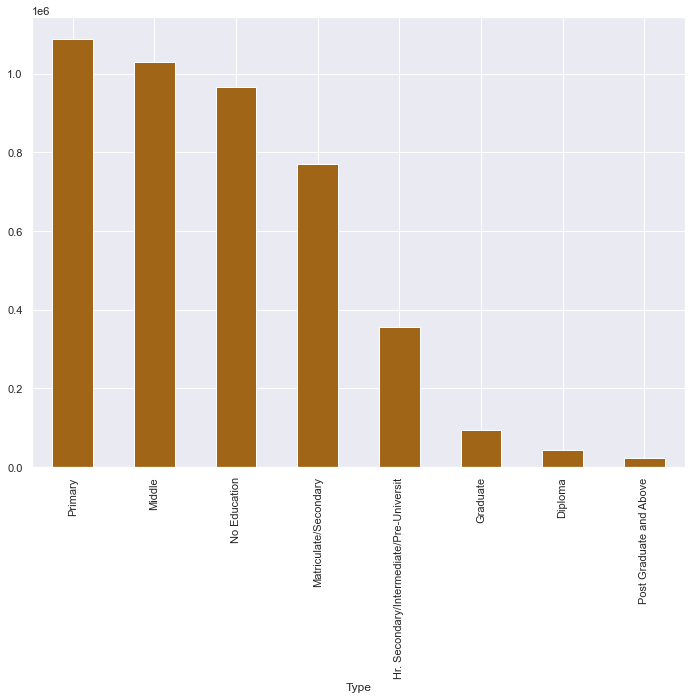

In [27]:
# 3.Plotting the Bar Graph of suicides done by people with different Education Background
filter_education.plot(kind='bar')
plt.xticks(rotation=90)